<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Recupero dati da Binance

In [12]:
!pip install binance-connector

In [13]:
from binance.spot import Spot as Client
import pandas as pd

In [14]:
spot_client = Client(base_url="https://api.binance.com")
data = spot_client.klines("ADAUSDT", "1m", limit=1000)
df = pd.DataFrame(data)

In [15]:
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1652520540000,0.53060000,0.53100000,0.52960000,0.53010000,154768.40000000,1652520599999,82082.73663000,300,61195.30000000,32463.57360000,0
1,1652520600000,0.53010000,0.53040000,0.52880000,0.52880000,140528.60000000,1652520659999,74436.91835000,279,47589.90000000,25211.54141000,0
2,1652520660000,0.52880000,0.52960000,0.52770000,0.52780000,139925.00000000,1652520719999,73983.51391000,272,45542.50000000,24085.39196000,0
3,1652520720000,0.52780000,0.52860000,0.52680000,0.52700000,375538.90000000,1652520779999,198106.50350000,707,196830.50000000,103836.63670000,0
4,1652520780000,0.52700000,0.52780000,0.52570000,0.52750000,248276.20000000,1652520839999,130743.91839000,483,121247.50000000,63845.47156000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1652580240000,0.52930000,0.53050000,0.52930000,0.53040000,103151.90000000,1652580299999,54687.99616000,167,78285.20000000,41503.57786000,0
996,1652580300000,0.53050000,0.53120000,0.53010000,0.53010000,105788.90000000,1652580359999,56156.09361000,181,29689.70000000,15760.36066000,0
997,1652580360000,0.53010000,0.53030000,0.52970000,0.52990000,16555.80000000,1652580419999,8773.06469000,66,5979.60000000,3168.54468000,0
998,1652580420000,0.52990000,0.52990000,0.52930000,0.52970000,28490.20000000,1652580479999,15091.83480000,68,9501.50000000,5032.87565000,0


In [16]:
df[0]=(pd.to_datetime(df[0],unit='ms'))

In [17]:
df.drop(6, axis=1, inplace=True)
df.drop(7, axis=1, inplace=True)
df.drop(8, axis=1, inplace=True)
df.drop(9, axis=1, inplace=True)
df.drop(10, axis=1, inplace=True)
df.drop(11, axis=1, inplace=True)

In [18]:
df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [19]:
df

,Date,Open,High,Low,Close,Volume
0,2022-05-14 09:29:00,0.53060000,0.53100000,0.52960000,0.53010000,154768.40000000
1,2022-05-14 09:30:00,0.53010000,0.53040000,0.52880000,0.52880000,140528.60000000
2,2022-05-14 09:31:00,0.52880000,0.52960000,0.52770000,0.52780000,139925.00000000
3,2022-05-14 09:32:00,0.52780000,0.52860000,0.52680000,0.52700000,375538.90000000
4,2022-05-14 09:33:00,0.52700000,0.52780000,0.52570000,0.52750000,248276.20000000
...,...,...,...,...,...,...
995,2022-05-15 02:04:00,0.52930000,0.53050000,0.52930000,0.53040000,103151.90000000
996,2022-05-15 02:05:00,0.53050000,0.53120000,0.53010000,0.53010000,105788.90000000
997,2022-05-15 02:06:00,0.53010000,0.53030000,0.52970000,0.52990000,16555.80000000
998,2022-05-15 02:07:00,0.52990000,0.52990000,0.52930000,0.52970000,28490.20000000


In [21]:
## Formula SMA

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

In [ ]:
## Grafico chiusure di Cardano

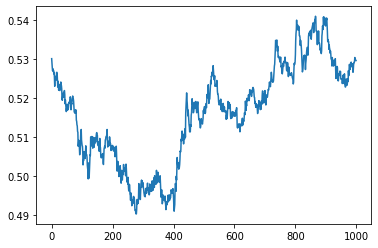

In [41]:
import matplotlib.pyplot as plt
df["Close"]=df["Close"].astype(float)
df["Close"].plot()